In [65]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
i
import seaborn as sns
sns.set_style('darkgrid')





In [25]:
df = pd.read_csv("nba_statistics.csv")

In [69]:
df.head()

,SEASON,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,1996-97,Bulls,82,69,13,0.841,3946,8458,3277,6923,...,2461,3696,2142,1109,717,332,286,1617,17,886
1,1996-97,Jazz,82,64,18,0.780,3966,8454,3131,6216,...,2410,3299,2199,1259,748,418,373,1980,18,721
2,1996-97,Heat,82,61,21,0.744,3961,7776,2822,6235,...,2401,3358,1735,1306,651,439,392,1919,21,450
3,1996-97,Rockets,82,57,25,0.695,3971,8248,3037,6484,...,2565,3492,2013,1365,688,347,365,1610,15,367
4,1996-97,Knicks,82,57,25,0.695,3971,7819,2882,6227,...,2516,3489,1809,1462,630,378,295,2033,14,256


In [82]:
df.columns

Index(['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [83]:
df.rename(columns = {'WIN%' : 'WIN_PERCENT', 'FG%': 'FG_PERCENT', '3P%': '3P_PERCENT', 'FT%': 'FT_PERCENT'}, inplace=True)

In [92]:
df.rename(columns = {'+/-' : 'PLUS_MINUS'}, inplace=True)

In [93]:
df.columns

Index(['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN_PERCENT', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG_PERCENT', '3PM', '3PA', '3P_PERCENT', 'FTM', 'FTA',
       'FT_PERCENT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PLUS_MINUS'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 28 columns):
SEASON         653 non-null object
TEAM           653 non-null object
GP             653 non-null int64
W              653 non-null int64
L              653 non-null int64
WIN_PERCENT    653 non-null float64
MIN            653 non-null int64
PTS            653 non-null int64
FGM            653 non-null int64
FGA            653 non-null int64
FG_PERCENT     653 non-null float64
3PM            653 non-null int64
3PA            653 non-null int64
3P_PERCENT     653 non-null float64
FTM            653 non-null int64
FTA            653 non-null int64
FT_PERCENT     653 non-null float64
OREB           653 non-null int64
DREB           653 non-null int64
REB            653 non-null int64
AST            653 non-null int64
TOV            653 non-null int64
STL            653 non-null int64
BLK            653 non-null int64
BLKA           653 non-null int64
PF             653 non-null int64
P

In [54]:
df.columns

Index(['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [55]:
df.isna()

,SEASON,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
650,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df.shape

(653, 28)

In [30]:
df.describe()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.00000,653.000000,...,653.000000,653.000000,653.000000,653.00000,653.000000,653.000000,653.000000,653.000000,653.00000,653.000000
mean,81.261868,40.630934,40.630934,0.500003,3929.860643,8067.891271,3015.006126,6662.228178,45.25023,549.584992,...,2518.941807,3440.989280,1779.062787,1187.11026,623.283308,399.891271,399.891271,1725.777948,1088.63706,0.000000
std,3.352094,12.676609,12.677697,0.154525,162.293797,604.014389,215.650350,402.725837,1.58620,191.307130,...,202.886523,215.681972,183.606017,110.08835,77.477016,69.461969,59.701267,170.218331,799.47885,373.015637
min,66.000000,7.000000,9.000000,0.106000,3168.000000,5739.000000,2193.000000,5086.000000,40.80000,189.000000,...,1879.000000,2560.000000,1224.000000,738.00000,390.000000,195.000000,245.000000,1109.000000,0.00000,-966.000000
25%,82.000000,32.000000,31.000000,0.390000,3956.000000,7778.000000,2911.000000,6465.000000,44.20000,409.000000,...,2404.000000,3337.000000,1670.000000,1124.00000,573.000000,350.000000,359.000000,1636.000000,13.00000,-249.000000
50%,82.000000,41.000000,40.000000,0.512000,3966.000000,8062.000000,3012.000000,6688.000000,45.20000,515.000000,...,2511.000000,3451.000000,1772.000000,1192.00000,621.000000,394.000000,402.000000,1731.000000,1587.00000,18.000000
75%,82.000000,50.000000,49.000000,0.610000,3971.000000,8424.000000,3144.000000,6904.000000,46.20000,663.000000,...,2647.000000,3568.000000,1891.000000,1252.00000,672.000000,445.000000,439.000000,1839.000000,1714.00000,279.000000
max,82.000000,73.000000,72.000000,0.890000,4016.000000,9686.000000,3612.000000,7706.000000,50.40000,1323.000000,...,3316.000000,4078.000000,2491.000000,1557.00000,987.000000,663.000000,565.000000,2223.000000,2104.00000,954.000000


In [34]:
# Define the problem
x_cols = ['SEASON', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
dependent_var = "Win%"
independent_var = ["PTS", "FG%", "3P%", "OREB"]

In [41]:
x_cols

['SEASON',
 'TEAM',
 'GP',
 'W',
 'L',
 'WIN%',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-']

In [50]:
# # Investigate whether multicollinearity exists between the review features 
# # (num_reviews, play_star_rating, star_rating, val_star_rating)
# features = ['Overall rank', 'Score', 'GDP per capita',
#        'Social support', 'Healthy life expectancy',
#        'Freedom to make life choices', 'Generosity',
#        'Perceptions of corruption']

correlation = df[x_cols].corr()
correlation

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
GP,1.000000,0.131891,0.132529,-0.000182,0.996175,0.623983,0.619325,0.702819,0.063377,0.145317,...,0.525256,0.669191,0.472216,0.448948,0.330569,0.200862,0.234016,0.560666,-0.056391,-0.000378
W,0.131891,1.000000,-0.965041,0.990405,0.129273,0.359328,0.314890,0.023137,0.604157,0.232929,...,0.345627,0.258915,0.391536,-0.259494,0.180943,0.239865,-0.420347,-0.097611,0.003884,0.963716
L,0.132529,-0.965041,1.000000,-0.990368,0.134135,-0.194311,-0.151108,0.162696,-0.587348,-0.194486,...,-0.206715,-0.081953,-0.266644,0.378177,-0.093522,-0.186735,0.482187,0.245848,-0.018793,-0.963733
WIN%,-0.000182,0.990405,-0.990368,1.000000,-0.001958,0.279480,0.235567,-0.069789,0.602235,0.215111,...,0.279112,0.173257,0.330998,-0.319870,0.139297,0.215312,-0.453441,-0.173172,0.011373,0.971651
MIN,0.996175,0.129273,0.134135,-0.001958,1.000000,0.616652,0.612902,0.697667,0.059390,0.137312,...,0.520676,0.664627,0.466647,0.448251,0.322101,0.199964,0.230731,0.563011,-0.056515,-0.003593
PTS,0.623983,0.359328,-0.194311,0.279480,0.616652,1.000000,0.949190,0.825837,0.514194,0.672286,...,0.762998,0.686252,0.672806,0.112182,0.289989,0.144950,-0.002450,0.191241,0.343381,0.295296
FGM,0.619325,0.314890,-0.151108,0.235567,0.612902,0.949190,1.000000,0.872380,0.537102,0.567769,...,0.744505,0.694671,0.733754,0.088232,0.298332,0.170640,-0.005396,0.156544,0.298341,0.247180
FGA,0.702819,0.023137,0.162696,-0.069789,0.697667,0.825837,0.872380,1.000000,0.057424,0.512756,...,0.717237,0.793132,0.588961,0.179930,0.326253,0.127563,0.235321,0.255732,0.172848,-0.061934
FG%,0.063377,0.604157,-0.587348,0.602235,0.059390,0.514194,0.537102,0.057424,1.000000,0.266875,...,0.282141,0.054403,0.479910,-0.122700,0.051741,0.130780,-0.411158,-0.110483,0.309318,0.611414
3PM,0.145317,0.232929,-0.194486,0.215111,0.137312,0.672286,0.567769,0.512756,0.266875,1.000000,...,0.627165,0.328706,0.361788,-0.199077,0.026746,-0.078032,-0.223348,-0.235982,0.488362,0.227177


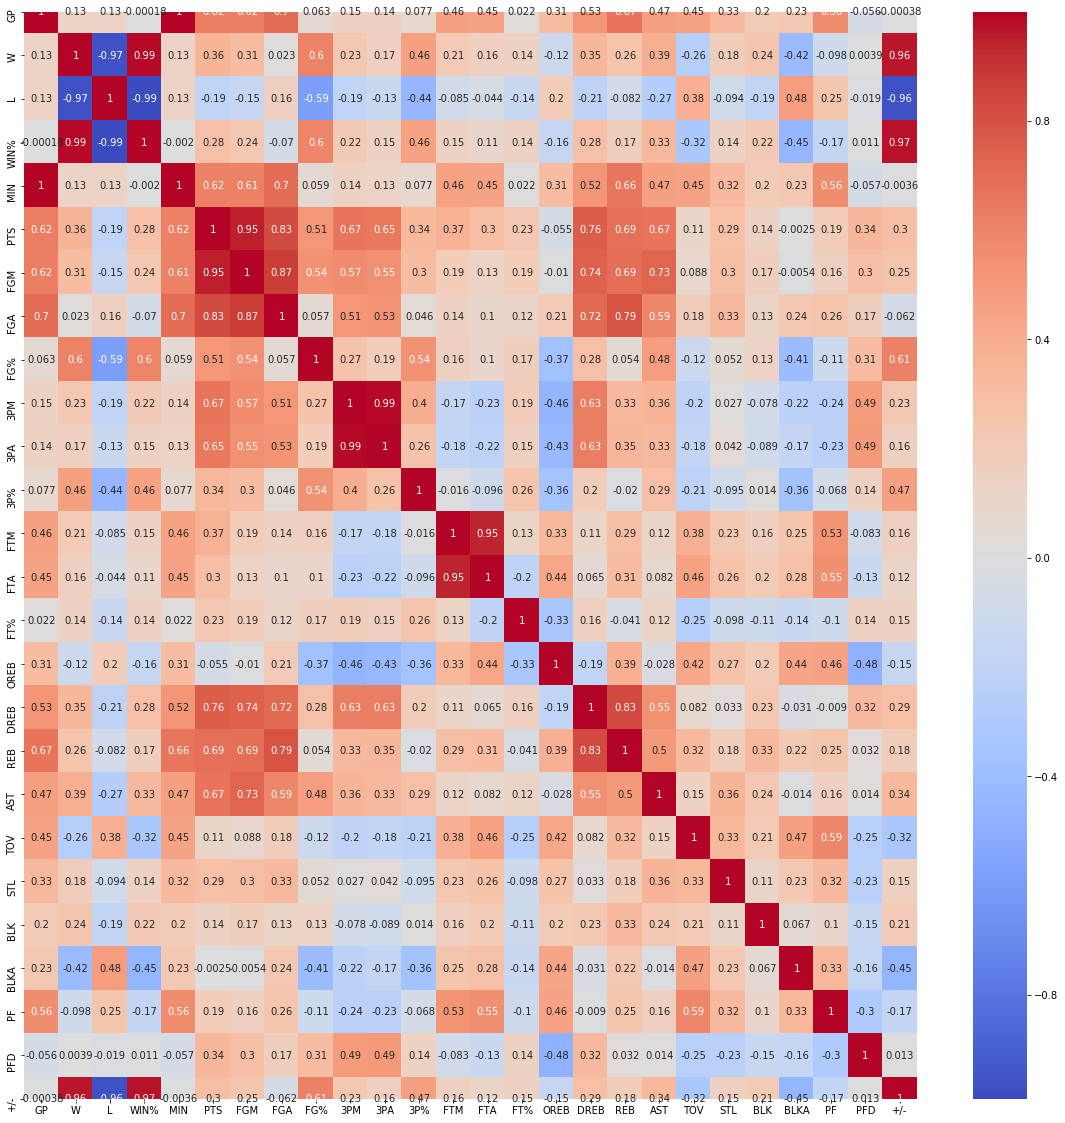

In [48]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot =True, cmap = "coolwarm", linecolor="white")

In [56]:
x_cols

['SEASON',
 'TEAM',
 'GP',
 'W',
 'L',
 'WIN%',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-']

In [58]:
three_point = df[x_cols]['3PM']
win_percent = df[x_cols]['WIN%']

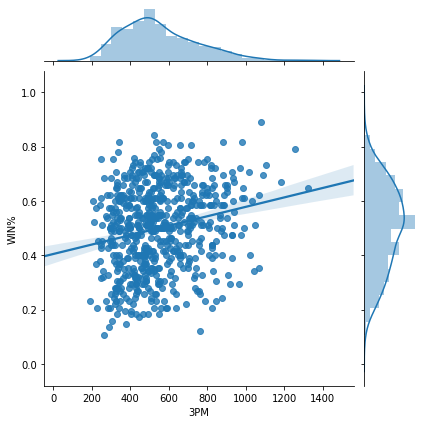

In [60]:
sns.jointplot(x= three_point, y= win_percent, data= df, kind='reg')

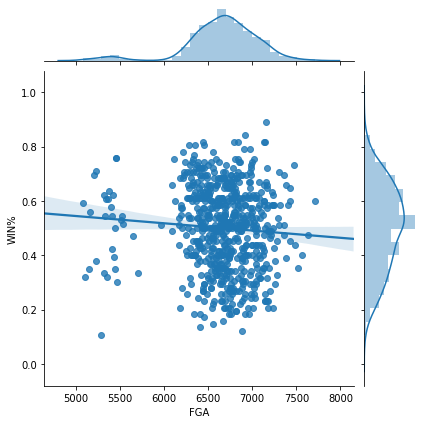

In [61]:
sns.jointplot(x= df[x_cols]['FGA'], y= win_percent, data= df, kind='reg')

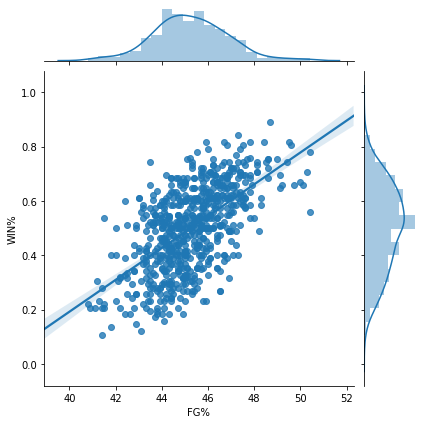

In [63]:
sns.jointplot(x= df[x_cols]['FG%'], y= win_percent, data= df, kind='reg')

In [ ]:
sns.jointplot(x= df[x_cols]['FGA'], y= win_percent, data= df, kind='reg')

In [ ]:
sns.jointplot(x= df[x_cols]['FGA'], y= win_percent, data= df, kind='reg')

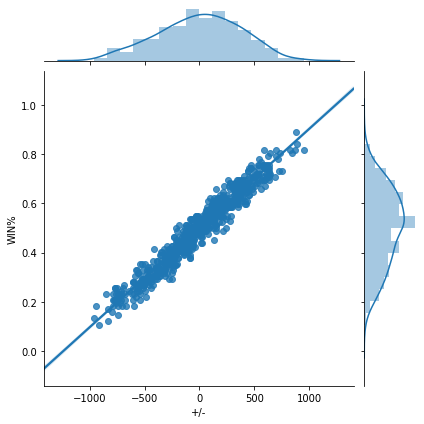

In [62]:
sns.jointplot(x= df[x_cols]['+/-'], y= win_percent, data= df, kind='reg')

### Fitting the initial model
Initial model selction- WHat type of model should we select and why?

* Choose a regression line with a guess of values for  𝑚  and  𝑏 
* Calculate the RSS
* Adjust  𝑚  and  𝑏 , as these are the only things that can vary in a single-variable regression line.
* Again calculate the RSS
* Repeat this process
* The regression line (that is, the values of  𝑏  and  𝑚 ) with the smallest RSS is our best fit line

 Initial Exploration:  Linear regression

In [88]:
# building a linear regression model using statsmodel WIN_PERCENT regressed on PTS
model = ols(formula='WIN_PERCENT~PTS', data=df).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WIN_PERCENT   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     55.16
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           3.50e-13
Time:                        19:15:50   Log-Likelihood:                 319.90
No. Observations:                 653   AIC:                            -635.8
Df Residuals:                     651   BIC:                            -626.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0768      0.078     -0.987      0.324      -0.230       0.076
PTS          7.15e-05   9.63e-06      7.427      0.000    5.26e-05    9.04e-05
==============================================================================
Omnibus:                       31.005   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.385
Skew:                          -0.131   Prob(JB):                     0.000752
Kurtosis:                       2.322   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# linear regression 
model = ols(formula='WIN_PERCENT~PLUS_MINUS', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WIN_PERCENT   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.100e+04
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:54:59   Log-Likelihood:                 1235.1
No. Observations:                 653   AIC:                            -2466.
Df Residuals:                     651   BIC:                            -2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5000      0.001    349.469      0.000       0.497       0.503
PLUS_MINUS     0.0004   3.84e-06    104.861      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.088   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.747
Skew:                          -0.080   Prob(JB):                        0.253
Kurtosis:                       2.725   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# dependent_var = "Win%"
# independent_var = ["PTS", "FG%", "3P%", "OREB"]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()


In [ ]:
# r_sq = model.score(x, y)
# >>> print('coefficient of determination:', r_sq)


### Assessing the Selected Model
Determine whether the model we chose was adequate.  It is important to understand why one model might be a better than another model.

### Checking p_values:  
Determine whether the variable we are working with are under the .05 threshold.  If not, determine what variable are better suited given the data.


### Initial Refinement of the Model


In [ ]:
WHat model we will use and why that model

### Checking for Multicolinearity

### Checking for Normality

### Checking for Homoscedasticity